<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(3_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.2_n250.csv',
 'data_multi_delta_3.2_n120.csv',
 'data_multi_delta_3.2_n60.csv',
 'data_multi_delta_3.2_n30.csv',
 'data_multi_delta_3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,94.943319,50.096682,45.386214,67.082823,267.509038,411.471363,-143.962325
1,0.0,1.0,88.689014,48.612073,48.522257,54.828272,250.651617,395.521202,-144.869586
2,0.0,2.0,73.744622,42.327221,61.343432,156.662999,344.078273,364.669482,-20.591209
3,0.0,3.0,69.709361,29.474749,70.307790,188.505539,367.997439,459.721270,-91.723831
4,0.0,4.0,60.926978,72.075122,81.116831,-728.200215,-504.081285,-106.300542,-397.780742
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,62.841767,40.512818,37.257680,729.603821,880.216085,615.165115,265.050970
19996,999.0,16.0,28.148818,48.465979,36.464069,128.592095,251.670962,83.395484,168.275477
19997,999.0,17.0,26.234311,35.414945,45.854643,499.816925,617.320824,-200.729629,818.050453
19998,999.0,18.0,53.083023,29.263030,76.460809,48.461633,217.268494,-65.207138,282.475632


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,94.943319,50.096682,45.386214,67.082823,267.509038,411.471363,-143.962325
1,0.0,1.0,88.689014,48.612073,48.522257,54.828272,250.651617,395.521202,-144.869586
2,0.0,2.0,73.744622,42.327221,61.343432,156.662999,344.078273,364.669482,-20.591209
3,0.0,3.0,69.709361,29.474749,70.307790,188.505539,367.997439,459.721270,-91.723831
4,0.0,4.0,60.926978,72.075122,81.116831,-728.200215,-504.081285,-106.300542,-397.780742
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,62.841767,40.512818,37.257680,729.603821,880.216085,615.165115,265.050970
19996,999.0,16.0,28.148818,48.465979,36.464069,128.592095,251.670962,83.395484,168.275477
19997,999.0,17.0,26.234311,35.414945,45.854643,499.816925,617.320824,-200.729629,818.050453
19998,999.0,18.0,53.083023,29.263030,76.460809,48.461633,217.268494,-65.207138,282.475632


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    94.943319  50.096682  45.386214    67.082823   267.509038   
      1.0    88.689014  48.612073  48.522257    54.828272   250.651617   
      2.0    73.744622  42.327221  61.343432   156.662999   344.078273   
      3.0    69.709361  29.474749  70.307790   188.505539   367.997439   
      4.0    60.926978  72.075122  81.116831  -728.200215  -504.081285   
...                ...        ...        ...          ...          ...   
999.0 15.0   62.841767  40.512818  37.257680   729.603821   880.216085   
      16.0   28.148818  48.465979  36.464069   128.592095   251.670962   
      17.0   26.234311  35.414945  45.854643   499.816925   617.320824   
      18.0   53.083023  29.263030  76.460809    48.461633   217.268494   
      19.0   39.020234  94.549775  53.978703  2191.471189  2389.019901   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    411.471363  -143.962325  
      1.0    395.521202  -144.869586  
      2.0    364.669482   -20.591209  
      3.0    459.721270   -91.723831  
      4.0   -106.300542  -397.780742  
...                 ...          ...  
999.0 15.0   615.165115   265.050970  
      16.0    83.395484   168.275477  
      17.0  -200.729629   818.050453  
      18.0   -65.207138   282.475632  
      19.0   695.868981  1693.150921  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    94.943319  50.096682  45.386214    67.082823   267.509038   
      1.0    88.689014  48.612073  48.522257    54.828272   250.651617   
      2.0    73.744622  42.327221  61.343432   156.662999   344.078273   
      3.0    69.709361  29.474749  70.307790   188.505539   367.997439   
      4.0    60.926978  72.075122  81.116831  -728.200215  -504.081285   
...                ...        ...        ...          ...          ...   
999.0 15.0   62.841767  40.512818  37.257680   729.603821   880.216085   
      16.0   28.148818  48.465979  36.464069   128.592095   251.670962   
      17.0   26.234311  35.414945  45.854643   499.816925   617.320824   
      18.0   53.083023  29.263030  76.460809    48.461633   217.268494   
      19.0   39.020234  94.549775  53.978703  2191.471189  2389.019901   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    411.471363  -143.962325  
      1.0    395.521202  -144.869586  
      2.0    364.669482   -20.591209  
      3.0    459.721270   -91.723831  
      4.0   -106.300542  -397.780742  
...                 ...          ...  
999.0 15.0   615.165115   265.050970  
      16.0    83.395484   168.275477  
      17.0  -200.729629   818.050453  
      18.0   -65.207138   282.475632  
      19.0   695.868981  1693.150921  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,94.943319,50.096682,45.386214,67.082823,267.509038,411.471363,-143.962325
1,0.0,1.0,88.689014,48.612073,48.522257,54.828272,250.651617,395.521202,-144.869586
2,0.0,2.0,73.744622,42.327221,61.343432,156.662999,344.078273,364.669482,-20.591209
3,0.0,3.0,69.709361,29.474749,70.307790,188.505539,367.997439,459.721270,-91.723831
4,0.0,4.0,60.926978,72.075122,81.116831,-728.200215,-504.081285,-106.300542,-397.780742
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,62.841767,40.512818,37.257680,729.603821,880.216085,615.165115,265.050970
19996,999.0,16.0,28.148818,48.465979,36.464069,128.592095,251.670962,83.395484,168.275477
19997,999.0,17.0,26.234311,35.414945,45.854643,499.816925,617.320824,-200.729629,818.050453
19998,999.0,18.0,53.083023,29.263030,76.460809,48.461633,217.268494,-65.207138,282.475632


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    94.943319  50.096682  45.386214    67.082823   267.509038   
      1.0    88.689014  48.612073  48.522257    54.828272   250.651617   
      2.0    73.744622  42.327221  61.343432   156.662999   344.078273   
      3.0    69.709361  29.474749  70.307790   188.505539   367.997439   
      4.0    60.926978  72.075122  81.116831  -728.200215  -504.081285   
...                ...        ...        ...          ...          ...   
999.0 15.0   62.841767  40.512818  37.257680   729.603821   880.216085   
      16.0   28.148818  48.465979  36.464069   128.592095   251.670962   
      17.0   26.234311  35.414945  45.854643   499.816925   617.320824   
      18.0   53.083023  29.263030  76.460809    48.461633   217.268494   
      19.0   39.020234  94.549775  53.978703  2191.471189  2389.019901   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    411.471363  -143.962325  
      1.0    395.521202  -144.869586  
      2.0    364.669482   -20.591209  
      3.0    459.721270   -91.723831  
      4.0   -106.300542  -397.780742  
...                 ...          ...  
999.0 15.0   615.165115   265.050970  
      16.0    83.395484   168.275477  
      17.0  -200.729629   818.050453  
      18.0   -65.207138   282.475632  
      19.0   695.868981  1693.150921  

[20000 rows x 7 columns]

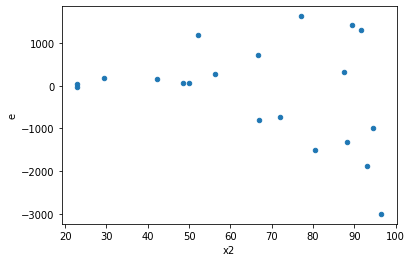

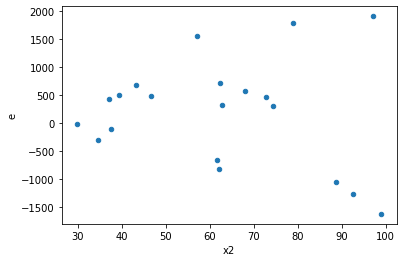

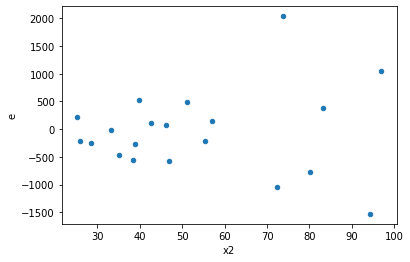

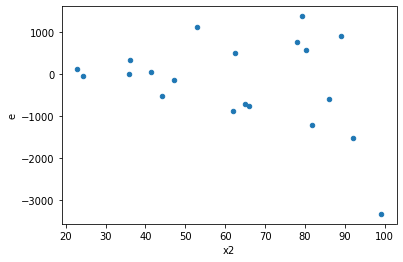

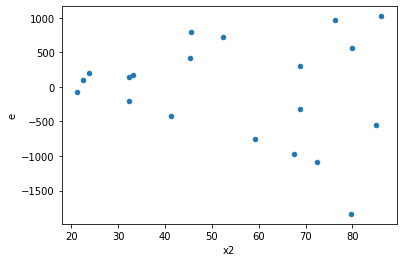

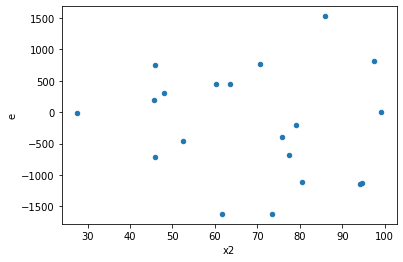

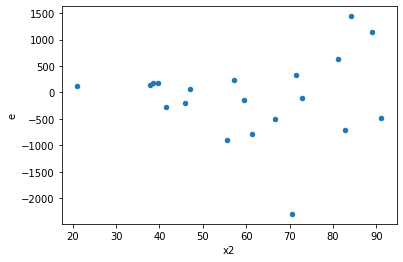

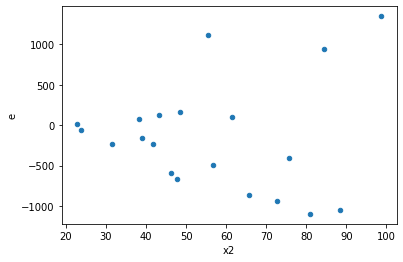

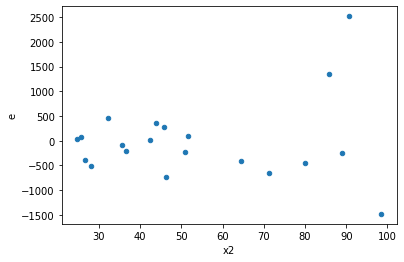

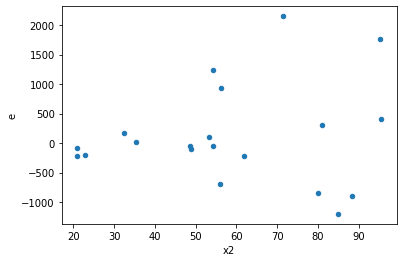

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,5.0,5.0,739039.3349405949,7776822.588764374,147807.86698811897,1555364.5177528749,10.52288047616503,0.02190289505564591,0.989048552472177,0.010951447527822955,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,2421558.0103446227,3527368.2374049514,484311.6020689245,705473.6474809903,1.4566523793096975,0.6898570034770779,0.655071498261461,0.34492850173853895,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,699464.0035964971,2131831.622259501,139892.8007192994,426366.3244519002,3.0478074801534754,0.24669696307046962,0.8766515184647652,0.12334848153523481,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,703539.6010408232,5689656.327573679,140707.92020816464,1137931.2655147358,8.08718701712931,0.038612680350137873,0.9806936598249311,0.019306340175068937,Reject001=1 : Homoscedasticity
9.0,5.0,5.0,446969.89195685735,3955329.7287794296,89393.97839137146,791065.9457558859,8.849208414156916,0.03188372781612836,0.9840581360919358,0.01594186390806418,Reject001=1 : Homoscedasticity
13.0,5.0,5.0,116424.2846329147,4205073.733207122,23284.85692658294,841014.7466414245,36.118527560342784,0.001257185677248085,0.999371407161376,0.0006285928386240425,Reject001=0 : Heteroscedasticity
16.0,5.0,5.0,843348.0282721812,1390692.5796060609,168669.60565443622,278138.51592121215,1.6490138507292866,0.5964416305083566,0.7017791847458217,0.2982208152541783,Reject001=1 : Homoscedasticity
17.0,5.0,5.0,2902272.0568727856,3800762.0287513942,580454.4113745571,760152.4057502788,1.3095815810068256,0.7744815348037299,0.612759232598135,0.38724076740186497,Reject001=1 : Homoscedasticity
19.0,5.0,5.0,1595493.2295524543,1795364.2795555606,319098.6459104909,359072.8559111121,1.125272264589409,0.9001071304270238,0.5499464347864881,0.4500535652135119,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,9621580.07234753,581739.9408895436,1924316.0144695058,116347.98817790873,0.060461996523987496,0.007923884155413119,Reject001=0 : Heteroscedasticity
1.0,5.0,5.0,4116395.4973050216,3277706.271735229,823279.0994610044,655541.2543470458,0.7962564029333727,0.8086770062208911,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,739039.3349405949,7776822.588764374,147807.86698811897,1555364.5177528749,10.52288047616503,0.02190289505564591,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,1280016.9281885452,478892.04513946956,256003.38563770903,95778.40902789391,0.37412946234796146,0.3044166642100406,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,3028833.6321037887,1149226.2300643276,605766.7264207577,229845.2460128655,0.37942864140282606,0.31114615714484006,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,2421558.0103446227,3527368.2374049514,484311.6020689245,705473.6474809903,1.4566523793096975,0.6898570034770779,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,3354373.5901201293,148054.6326331048,670874.7180240259,29610.926526620962,0.044137788667660764,0.0038124297426173443,Reject001=0 : Heteroscedasticity
7.0,5.0,5.0,699464.0035964971,2131831.622259501,139892.8007192994,426366.3244519002,3.0478074801534754,0.24669696307046962,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,703539.6010408232,5689656.327573679,140707.92020816464,1137931.2655147358,8.08718701712931,0.038612680350137873,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      821
Reject001=0 : Heteroscedasticity    179
Name: Result_test, dtype: int64